In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [8]:
df = pd.read_csv("Dataset3.csv", delimiter=';')
df.head()

,No,Country,Level of development,European Union Membership,Currency,Women Entrepreneurship Index,Entrepreneurship Index,Inflation rate,Female Labor Force Participation Rate
0,4,Austria,Developed,Member,Euro,54.9,64.9,0.90,67.1
1,6,Belgium,Developed,Member,Euro,63.6,65.5,0.60,58.0
2,17,Estonia,Developed,Member,Euro,55.4,60.2,-0.88,68.5
3,18,Finland,Developed,Member,Euro,66.4,65.7,-0.20,67.7
4,19,France,Developed,Member,Euro,68.8,67.3,0.00,60.6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     51 non-null     int64  
 1   Country                                51 non-null     object 
 2   Level of development                   51 non-null     object 
 3   European Union Membership              51 non-null     object 
 4   Currency                               51 non-null     object 
 5   Women Entrepreneurship Index           51 non-null     float64
 6   Entrepreneurship Index                 51 non-null     float64
 7   Inflation rate                         51 non-null     float64
 8   Female Labor Force Participation Rate  51 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 3.7+ KB


In [10]:
df.isnull().sum()

No                                       0
Country                                  0
Level of development                     0
European Union Membership                0
Currency                                 0
Women Entrepreneurship Index             0
Entrepreneurship Index                   0
Inflation rate                           0
Female Labor Force Participation Rate    0
dtype: int64

# Map: 'Level of development', 'European Union Membership', 'Currency', 'Women Entrepreneurship Index', 'Entrepreneurship Index', 'Inflation rate', 'Female Labor Force Participation Rate'

In [11]:
import requests
import io
url = "https://raw.githubusercontent.com/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv"
s = requests.get(url).content
codes = pd.read_csv(io.StringIO(s.decode('utf-8')))
codes = codes[['name','alpha-3']]
codes.columns = ['Country','Code']
codes.head()

KeyError: "None of [Index(['name', 'alpha-3'], dtype='object')] are in the [columns]"

In [ ]:
df = pd.merge(df, codes, on='Country')

for col in ['Level of development', 'European Union Membership', 'Currency', 'Women Entrepreneurship Index', 
            'Entrepreneurship Index', 'Inflation rate', 'Female Labor Force Participation Rate']:
    fig = px.choropleth(df, locations='Code', 
                        color=col, 
                        hover_name='Country',
                        color_continuous_scale=px.colors.sequential.Plasma)

    fig.show()

# Count developed and developing

In [7]:
pd.DataFrame(df.groupby('Level of development').No.count()).reset_index()

,Level of development,No
0,Developed,26
1,Developing,21


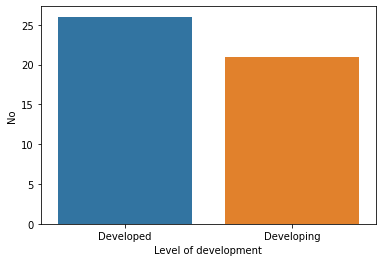

In [8]:
df_develop = pd.DataFrame(df.groupby('Level of development').No.count()).reset_index()
plot = sns.barplot(x='Level of development', y='No', data=df_develop)

# European Union Membership

In [9]:
pd.DataFrame(df.groupby('European Union Membership').No.count()).reset_index()

,European Union Membership,No
0,Member,20
1,Not Member,27


# Currency

In [10]:
pd.DataFrame(df.groupby('Currency').No.count()).reset_index()

,Currency,No
0,Euro,15
1,National Currency,32
